# **Image Data Augmentation**


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [1]:
# !wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp
!wget -O Batman.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg

--2023-09-15 04:59:17--  https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.197.20.140, 2600:141b:e800:1482::f33, 2600:141b:e800:1480::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.197.20.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24770 (24K) [image/jpeg]
Saving to: ‘Batman.jpg’

Batman.jpg          100%[===================>]  24.19K  --.-KB/s    in 0.02s   

2023-09-15 04:59:17 (1.00 MB/s) - ‘Batman.jpg’ saved [24770/24770]



In [4]:
image_org = load_img("Batman.jpg")
image = img_to_array(image_org)
image.shape  # height, width, channel

(360, 640, 3)

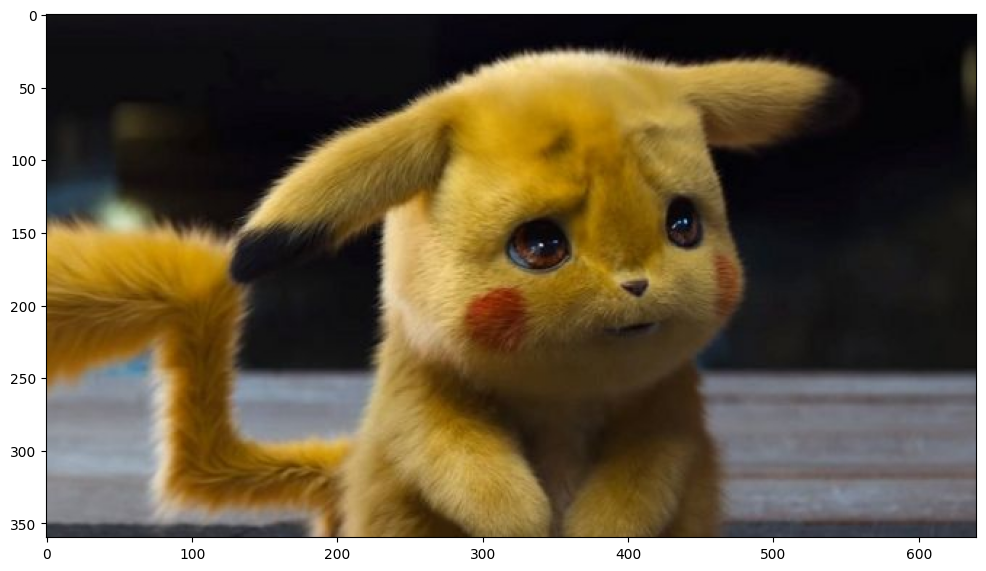

In [5]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [6]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [7]:
image.shape

(1, 360, 640, 3)

## **ImageDataGenerator**

- [**전체 옵션 참고**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.3,  # 이미지 좌우 이동
                         height_shift_range=0.3, # 이미지 상하 이동
                         zoom_range=0.2,         # 확대/축소 범위
                         shear_range=0.2,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                        #  vertical_flip=True,     # 세로 전환
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [14]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [15]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [16]:
!ls output

In [17]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 20장 채우면 멈추자
    if total == 20:
        break

In [18]:
!ls output

image_0_1125.jpg  image_0_3787.jpg  image_0_6552.jpg  image_0_8717.jpg
image_0_2228.jpg  image_0_3902.jpg  image_0_6647.jpg  image_0_874.jpg
image_0_2764.jpg  image_0_3948.jpg  image_0_7317.jpg  image_0_8943.jpg
image_0_3212.jpg  image_0_5149.jpg  image_0_8481.jpg  image_0_9553.jpg
image_0_3598.jpg  image_0_6426.jpg  image_0_8573.jpg  image_0_9653.jpg


In [19]:
import os

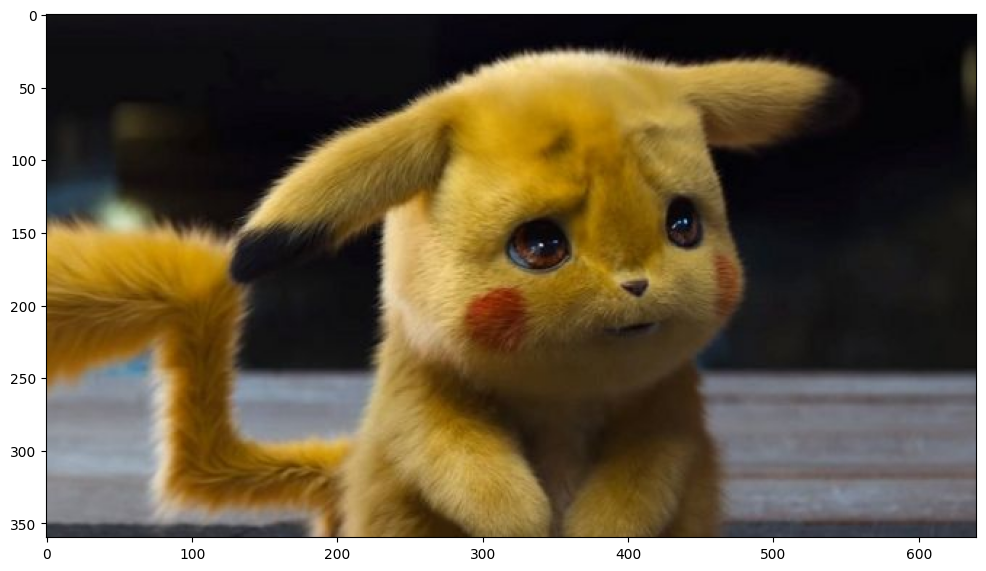

In [20]:
plt.figure(figsize=(12,8))
# plt.imshow(image)   # 차원 추가하여서 실행 X
plt.imshow(image_org)
plt.show()

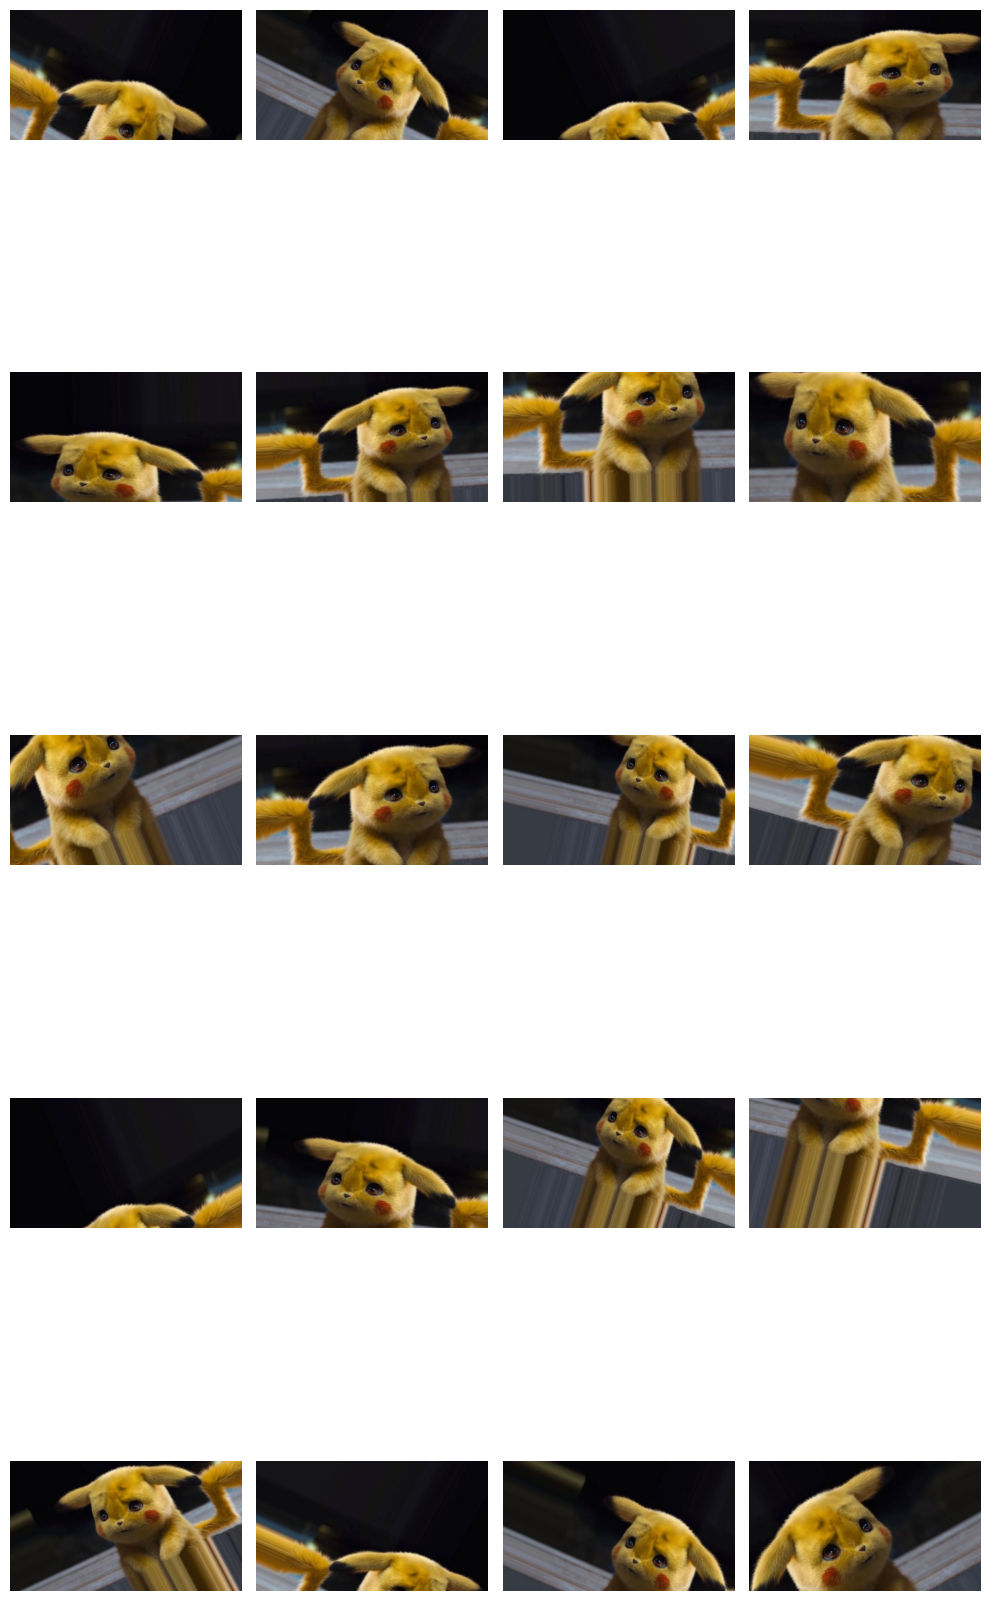

In [21]:
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(10, 20))
output_files = os.listdir('output')

for idx, ax in enumerate(axes.flat):  # flatten한 axes에 대해 인덱스와 함께 순회
    img = plt.imread( './output/'+output_files[idx] )
    ax.imshow( img )
    ax.axis('off')

plt.tight_layout()
plt.show()